In [1]:
# loading packages and functions
import torch
import numpy as np
from matplotlib import pyplot as plt
#import Ipynb_importer
import sys
sys.path.insert(1, '../src')
from neural_nmf import Neural_NMF, Energy_Loss_Func, L21_Norm, Recon_Loss_Func
from lsqnonneg_module import LsqNonneg
from train import train_unsupervised, train_supervised
#
import torch.nn as nn
from writer import Writer

# data loading session
from news_group_loading import get_data

from time import time

In [2]:
X, Y_sub, Y_super, vocab = get_data()
m = X.shape[0]
k1 = 10
k2 = 6

In [3]:
net = Neural_NMF([m, k1], 10)
loss_func = Energy_Loss_Func(lambd=1)

In [4]:
start = time()
history_supervised =train_supervised(net, X, Y_sub, loss_func=loss_func, epoch = 25, lr_nmf = 1e13, lr_classification= 1e9, weight_decay=0.99, decay_epoch=10, full_history=True, verbose=True, verbose_epoch=1, class_iters=2)
end = time()
end = time()
print("Training time: {}".format(end-start))


epoch =  1 
 tensor(2.2716, dtype=torch.float64)
epoch =  2 
 tensor(2.1938, dtype=torch.float64)
epoch =  3 
 tensor(2.1065, dtype=torch.float64)
epoch =  4 
 tensor(2.0260, dtype=torch.float64)
epoch =  5 
 tensor(1.9550, dtype=torch.float64)
epoch =  6 
 tensor(1.8934, dtype=torch.float64)
epoch =  7 
 tensor(1.8405, dtype=torch.float64)
epoch =  8 
 tensor(1.7948, dtype=torch.float64)
epoch =  9 
 tensor(1.7544, dtype=torch.float64)
epoch =  10 
 tensor(1.7188, dtype=torch.float64)
epoch =  11 
 tensor(1.6880, dtype=torch.float64)
epoch =  12 
 tensor(1.6618, dtype=torch.float64)
epoch =  13 
 tensor(1.6388, dtype=torch.float64)
epoch =  14 
 tensor(1.6184, dtype=torch.float64)
epoch =  15 
 tensor(1.6001, dtype=torch.float64)
epoch =  16 
 tensor(1.5835, dtype=torch.float64)
epoch =  17 
 tensor(1.5685, dtype=torch.float64)
epoch =  18 
 tensor(1.5545, dtype=torch.float64)
epoch =  19 
 tensor(1.5415, dtype=torch.float64)
epoch =  20 
 tensor(1.5294, dtype=torch.float64)
epoch =  

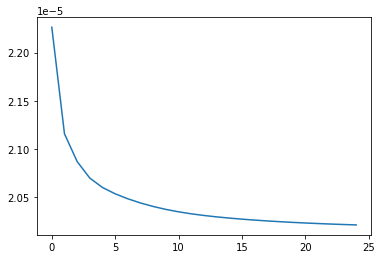

In [5]:
history_supervised.plot_scalar('loss_nmf')

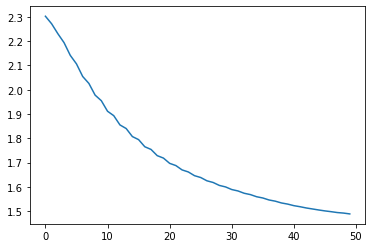

In [6]:
history_supervised.plot_scalar('loss_classification')

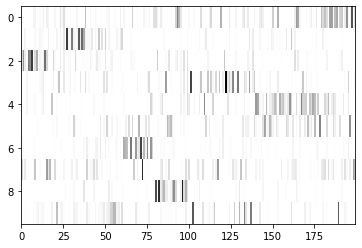

In [7]:
history_supervised.plot_tensor('S1', [-1])

In [8]:
A1_lst = history_supervised.get('A1')
S1_lst = history_supervised.get('S1')
weight_lst = history_supervised.get('weight')
pred = history_supervised.get('pred')[-1].detach().numpy()
A1 = A1_lst[-1]
S1 = S1_lst[-1]
B = weight_lst[-1]

In [9]:
Y_pred = np.argmax(pred, axis=0)
Y = Y_sub.numpy()
print("Accuracy: {}/{}".format(Y[Y_pred==Y].shape[0], Y.shape[0]))




Accuracy: 93/200


In [10]:
for i in range(A1.shape[1]):
    col = A1[:,i].numpy()
    top = col.argsort()
    print(top.shape)
    top = top[-10:][::-1]

    print("Row {} rows".format(i))
    for j in top:
        print(vocab[j])

(37693,)
Row 0 rows
[array(['say'], dtype='<U3')]
[array(['post'], dtype='<U4')]
[array(['people'], dtype='<U6')]
[array(['just'], dtype='<U4')]
[array(['accept'], dtype='<U6')]
[array(['god'], dtype='<U3')]
[array(['know'], dtype='<U4')]
[array(['objective'], dtype='<U9')]
[array(['net'], dtype='<U3')]
[array(['bible'], dtype='<U5')]
(37693,)
Row 1 rows
[array(['mac'], dtype='<U3')]
[array(['monitor'], dtype='<U7')]
[array(['lc'], dtype='<U2')]
[array(['video'], dtype='<U5')]
[array(['vga'], dtype='<U3')]
[array(['grayscale'], dtype='<U9')]
[array(['ntsc'], dtype='<U4')]
[array(['interested'], dtype='<U10')]
[array(['info'], dtype='<U4')]
[array(['use'], dtype='<U3')]
(37693,)
Row 2 rows
[array(['file'], dtype='<U4')]
[array(['autocad'], dtype='<U7')]
[array(['format'], dtype='<U6')]
[array(['tiff'], dtype='<U4')]
[array(['hello'], dtype='<U5')]
[array(['mail'], dtype='<U4')]
[array(['know'], dtype='<U4')]
[array(['iff'], dtype='<U3')]
[array(['convert'], dtype='<U7')]
[array(['thank'